In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd # read CSV file
import numpy as np # linear algebra
# visualization
import matplotlib.pyplot as plt
import seaborn as sns
# preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
# Algorithms
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
# scoring metrics
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix

import time

In [3]:
# defining attrited values
def attritted(y_test,y_test_predict):
  misclassified=0
  count = 0

  act = 0
  for i in range(len(y_test)):
    if y_test.iloc[i] == 1:
      act += 1
      if y_test_predict[i] != 1:
        misclassified += 1
      else:
        count += 1
  print("True values for employess that left the job are",act)
  print("Among those {} were predicted accurately and {} were misclassified.".format(count,misclassified))

In [4]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/HR analytic/HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.shape

(1470, 35)

In [7]:
# check for missing values
data = df.replace('?',np.NaN)
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))

print('Number of missing values:')
for col in data.columns:
    print('\t%s: %d' % (col,data[col].isna().sum()))

Number of instances = 1470
Number of attributes = 35
Number of missing values:
	Age: 0
	Attrition: 0
	BusinessTravel: 0
	DailyRate: 0
	Department: 0
	DistanceFromHome: 0
	Education: 0
	EducationField: 0
	EmployeeCount: 0
	EmployeeNumber: 0
	EnvironmentSatisfaction: 0
	Gender: 0
	HourlyRate: 0
	JobInvolvement: 0
	JobLevel: 0
	JobRole: 0
	JobSatisfaction: 0
	MaritalStatus: 0
	MonthlyIncome: 0
	MonthlyRate: 0
	NumCompaniesWorked: 0
	Over18: 0
	OverTime: 0
	PercentSalaryHike: 0
	PerformanceRating: 0
	RelationshipSatisfaction: 0
	StandardHours: 0
	StockOptionLevel: 0
	TotalWorkingYears: 0
	TrainingTimesLastYear: 0
	WorkLifeBalance: 0
	YearsAtCompany: 0
	YearsInCurrentRole: 0
	YearsSinceLastPromotion: 0
	YearsWithCurrManager: 0


** Check JobRole of employee**




In [8]:
df.JobRole.value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [9]:
# show descriptive statistics
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [10]:
#drop column that have constant values
df=df.drop_duplicates() #Dropping out duplicate values
df= df.drop(["Over18","EmployeeCount","EmployeeNumber","StandardHours"],axis = 1) #Dropping out irrelavant data
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [11]:
# perform descriptive analysis on categorical attributes
df.describe(include="O").T

,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
OverTime,1470,2,No,1054


In [12]:
 #exploratory data analysis
a = df[[ 'Attrition','BusinessTravel','Age', 'Department', 'EducationField', 'Gender', 'MaritalStatus', 'OverTime','Education','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobRole','JobSatisfaction','RelationshipSatisfaction','PercentSalaryHike','WorkLifeBalance']]

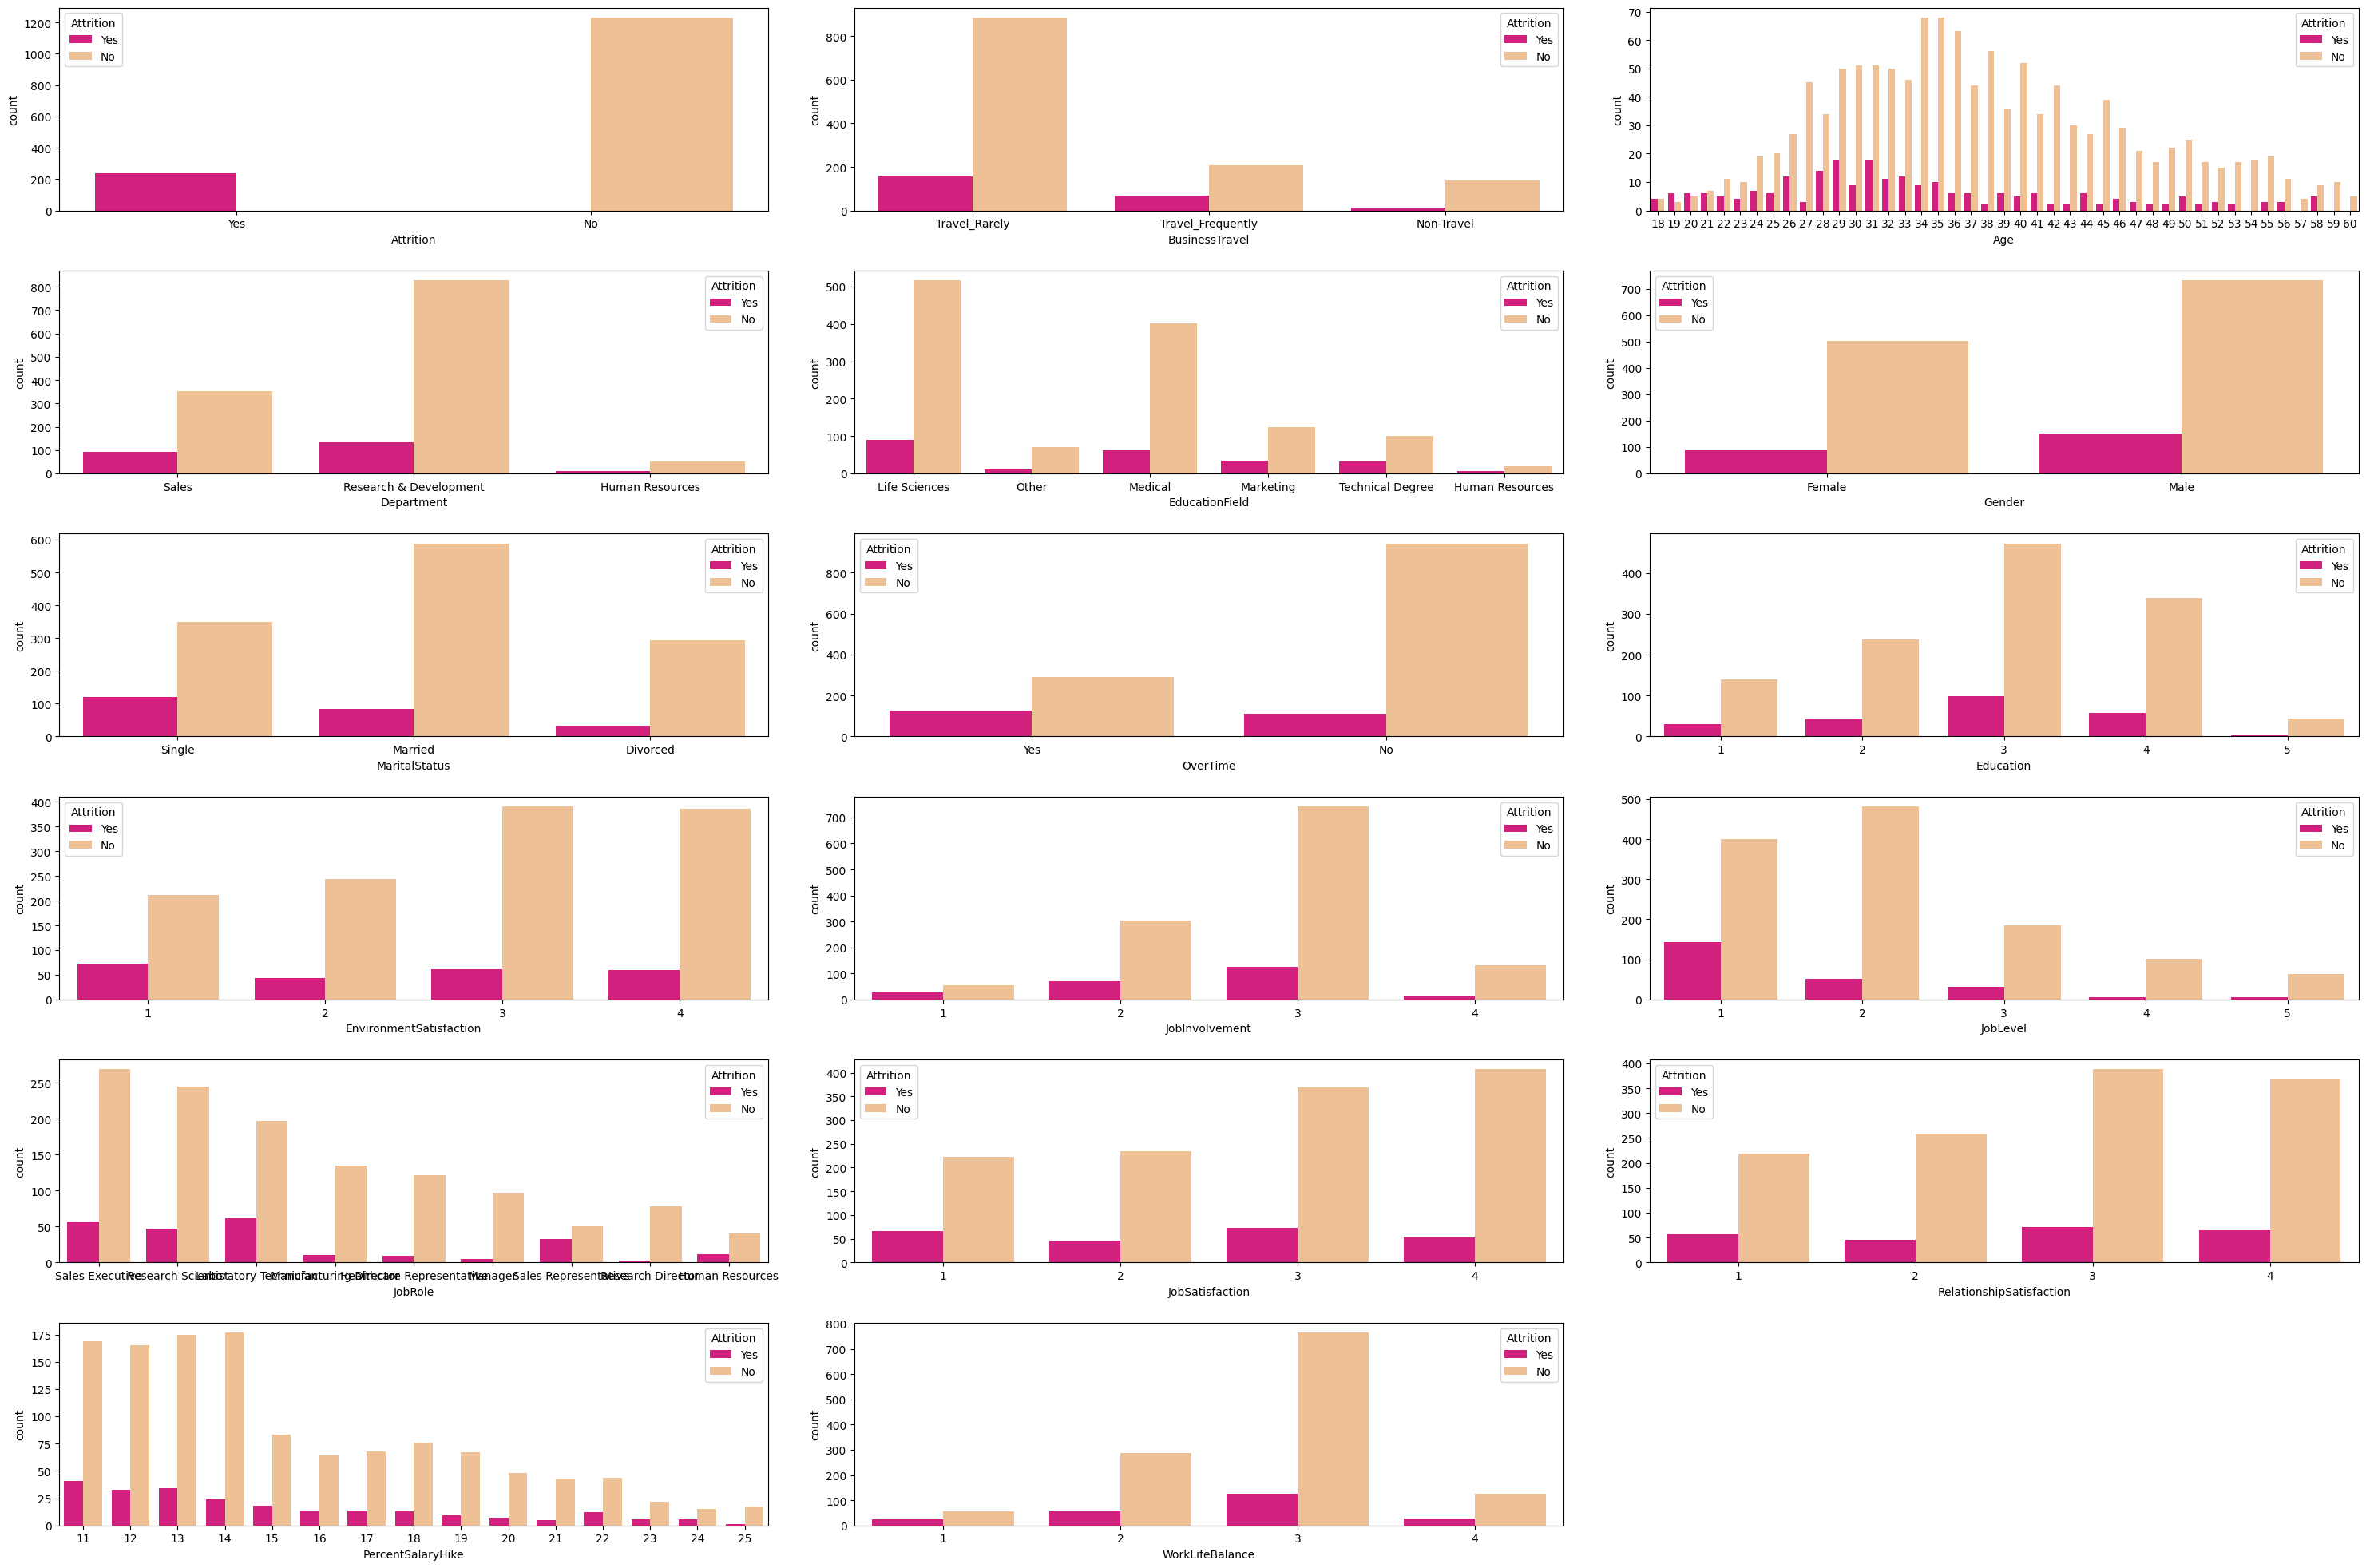

In [13]:
plt.figure(figsize=(30,20))
for index,column in enumerate(a):
    plt.subplot(6,3,index+1)
    sns.countplot(data=a,x=column, hue= df.Attrition, palette='Accent_r')

plt.tight_layout(pad = 2.0)

<ipython-input-14-94394651a836>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True,cmap = 'ocean')


<Axes: >

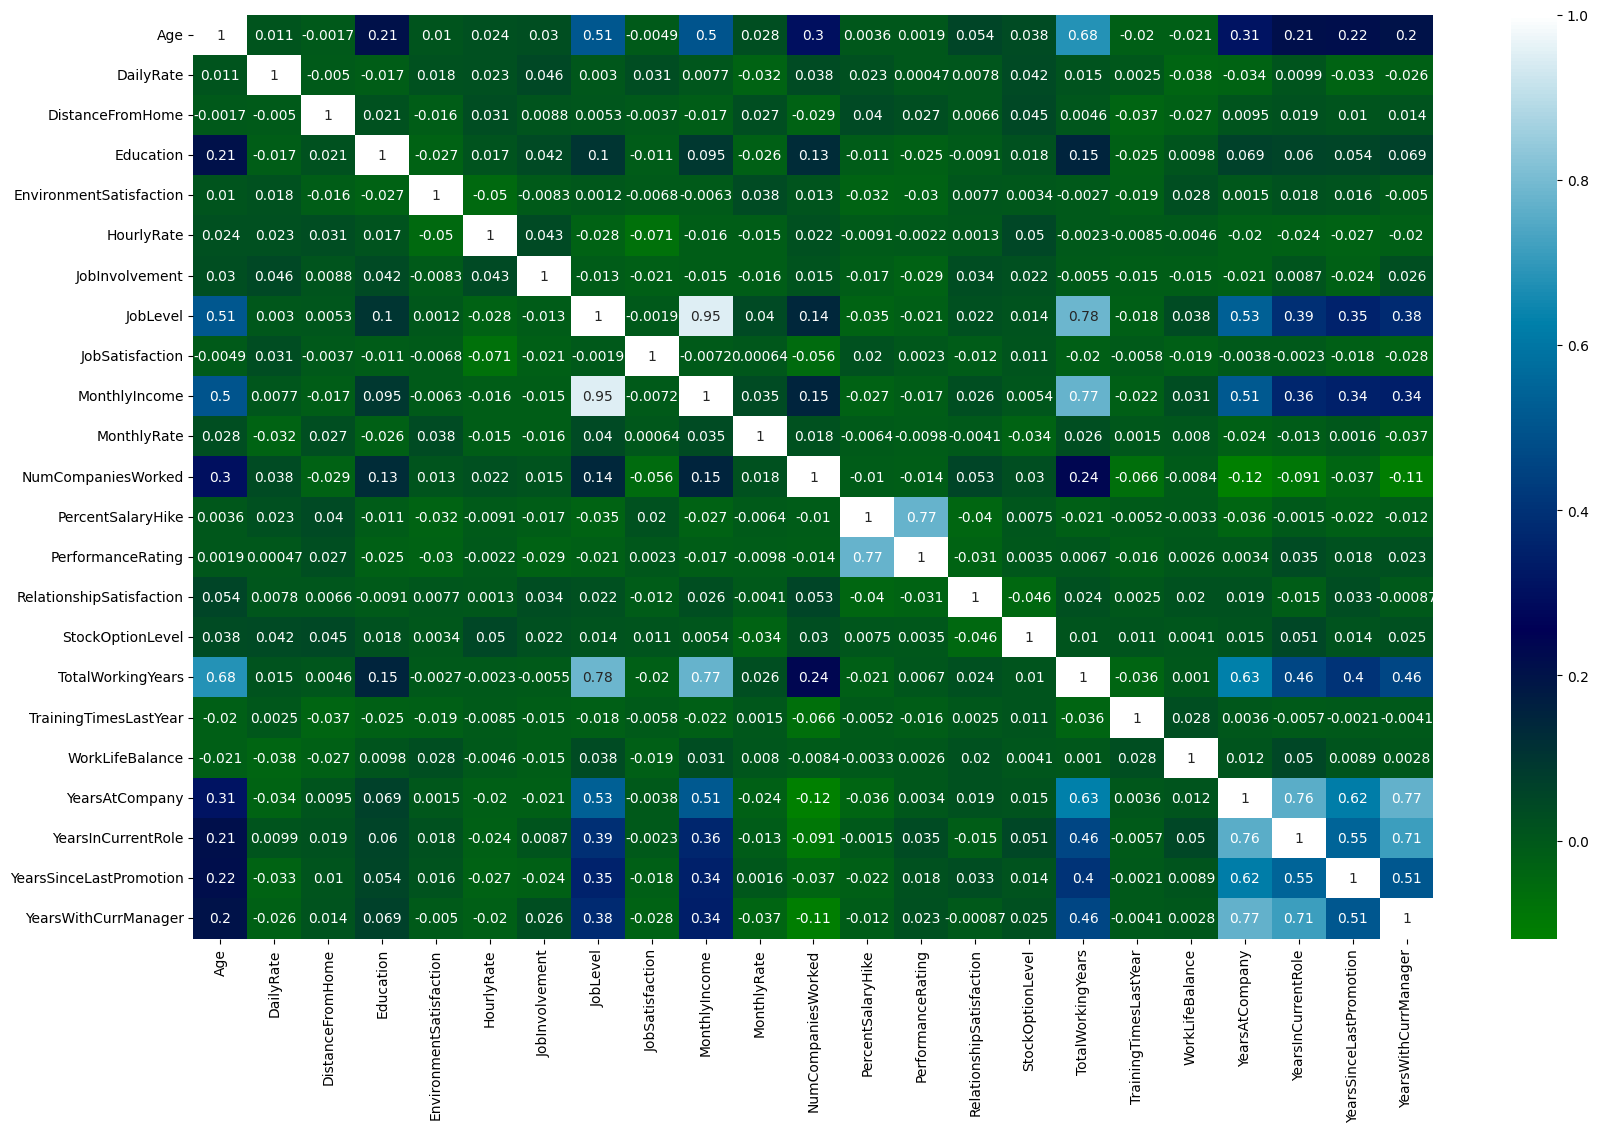

In [14]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(), annot=True,cmap = 'ocean')

In [15]:
# label encoding
listCategorialColumns = df.select_dtypes(include = 'object').columns.to_list()
labelencoder = LabelEncoder()
for i in listCategorialColumns:
    df[i] = labelencoder.fit_transform(df[i])
    df.head()

In [16]:
df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

<Axes: xlabel='Attrition', ylabel='count'>

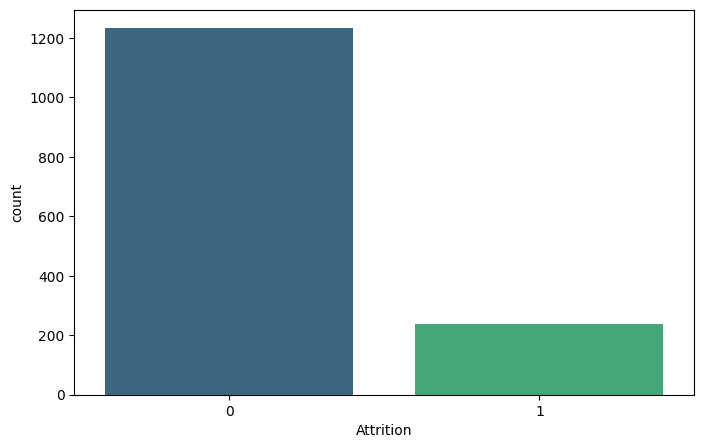

In [17]:
# Target data count
# Target Variable
plt.figure(figsize = (8, 5))
sns.countplot(x = 'Attrition', data = df, palette='viridis')

In [18]:
X = df.drop("Attrition",axis = 1)
y =  df["Attrition"]

In [19]:
print(X.columns)
print(X.shape)

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')
(1470, 30)


In [20]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int64

In [21]:
# data scalering
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled=pd.DataFrame(X_scaled)
X_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.446350,0.590048,0.742527,1.401512,-1.010909,-0.891688,-0.937414,-0.660531,-1.224745,1.383138,...,-0.426230,-1.584178,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834
1,1.322365,-0.913194,-1.297775,-0.493817,-0.147150,-1.868426,-0.937414,0.254625,0.816497,-0.240677,...,2.346151,1.191438,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-0.368715,0.806541
2,0.008343,0.590048,1.414363,-0.493817,-0.887515,-0.891688,1.316673,1.169781,0.816497,1.284725,...,-0.426230,-0.658973,-0.932014,-0.550208,0.155707,0.338096,-1.144294,-1.167687,-0.679146,-1.155935
3,-0.429664,-0.913194,1.461466,-0.493817,-0.764121,1.061787,-0.937414,1.169781,-1.224745,-0.486709,...,-0.426230,0.266233,-0.932014,-0.421642,0.155707,0.338096,0.161947,0.764998,0.252146,-1.155935
4,-1.086676,0.590048,-0.524295,-0.493817,-0.887515,-1.868426,0.565311,-1.575686,0.816497,-1.274014,...,-0.426230,1.191438,0.241988,-0.678774,0.155707,0.338096,-0.817734,-0.615492,-0.058285,-0.595227


In [22]:
# Data spliting for testing and traing
#X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=0)
from sklearn.model_selection import KFold
kf=KFold(n_splits=5,random_state=None,shuffle=True)
for train_index,test_index in kf.split(X):
    print("Train",train_index,"validation:",test_index)
    X_train,X_test=X.iloc[train_index,:],X.iloc[test_index]
    y_train,y_test=y[train_index],y[test_index]
# Data spliting for testing and traing


Train [   0    2    4 ... 1466 1467 1469] validation: [   1    3   23   24   35   39   40   47   48   63   65   70   76   83
   85   87   88   92   95   96   98  103  111  119  121  124  141  154
  158  160  166  169  170  179  183  185  190  192  202  205  208  211
  221  231  235  238  241  242  253  257  262  285  289  294  295  305
  309  314  324  325  340  342  349  350  354  355  356  364  365  367
  371  383  384  389  396  398  399  411  412  418  419  423  426  430
  438  448  452  454  467  471  474  482  484  492  493  497  499  504
  506  508  512  515  521  525  532  543  548  551  561  562  563  569
  573  583  584  593  596  601  602  603  612  630  636  640  642  644
  647  649  650  653  654  661  663  669  670  677  682  683  685  688
  697  701  705  709  712  715  719  722  731  743  746  750  758  761
  763  770  772  787  792  794  795  801  818  819  822  823  829  839
  840  843  848  851  852  861  863  872  877  879  883  886  889  895
  901  907  908  914  9

In [23]:
from imblearn.over_sampling import ADASYN
ad=ADASYN(random_state=42)

X_resampled, y_resampled = ad.fit_resample(X_train, y_train)
pd.value_counts(y_resampled)

0    982
1    945
Name: Attrition, dtype: int64

Text(0.5, 1.0, 'Class Distributions \n (0: Stay || 1: leave)')

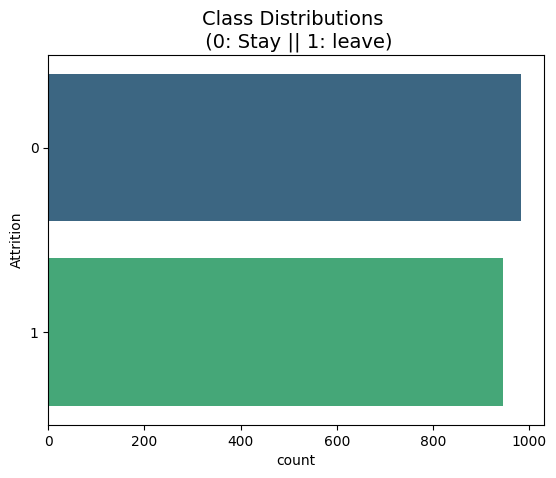

In [24]:
colors = ["#0101DF", "#DF0101"]

sns.countplot(y=y_resampled, data=df, label='count',palette='viridis')
plt.title('Class Distributions \n (0: Stay || 1: leave)', fontsize=14)

In [25]:
from sklearn.inspection import permutation_importance
def get_feature_importances(X,y,model,score='neg_mean_squared_error'):
    results = permutation_importance(model, X, y, scoring=score)
    return results.importances_mean


def plot_feature_importances(X,importance,title):
    # plot feature importance
    plt.barh([x for x in X.columns],importance)
    plt.xticks(range(0,len(importance)))
    plt.title(title)
    plt.show()

In [26]:
#applying rfc with optimal parameters
#applying rfc with optimal parameters
rfc = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)


rfc.fit(X_resampled, y_resampled)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto', n_estimators=1000, n_jobs=1,
                       oob_score=True)

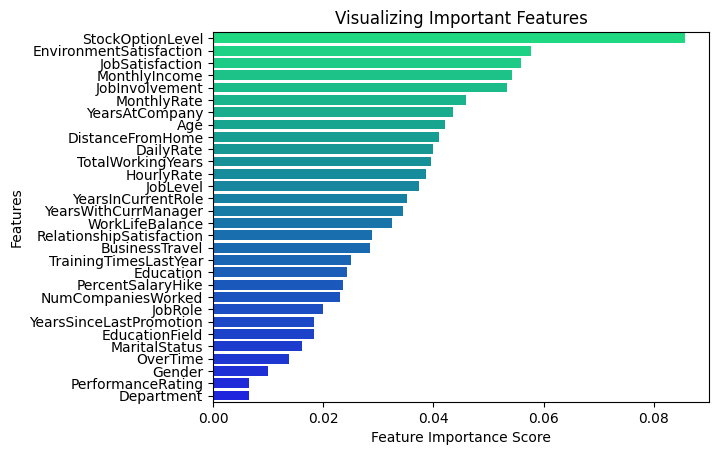

In [27]:
importances = get_feature_importances(X_train,y_train,rfc)
# Finding the variable with more importance
feature_imp = pd.Series(rfc.feature_importances_,index= X_train.columns).sort_values(ascending=False)
# Creating a bar plot
feature_imp=feature_imp[0:34,]
sns.barplot(x=feature_imp, y=feature_imp.index,palette='winter_r')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()


In [28]:
y_predict = rfc.predict(X_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0])

In [29]:
cnf_matrix = confusion_matrix(y_test, y_predict)
print(cnf_matrix)
plt.figure(figsize=(12,12))
confusion = pd.DataFrame(cnf_matrix, index=['will stay ', 'will leave'],
                         columns=['predicted_to stay','predicted_ to leave'])
confusion


[[234  17]
 [ 32  11]]


,predicted_to stay,predicted_ to leave
will stay,234,17
will leave,32,11


<Figure size 1200x1200 with 0 Axes>

<Axes: >

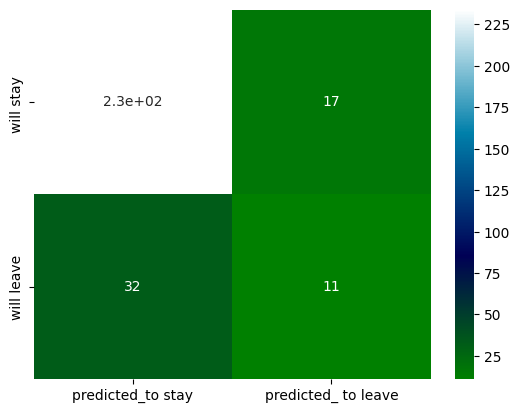

In [30]:
sns.heatmap(confusion, annot=True, cmap = 'ocean')

In [31]:
from sklearn import metrics
from sklearn.metrics import classification_report
print('accuracy %s' %metrics.accuracy_score(y_predict,y_test))
target_names = ['NO', 'YES']
print(classification_report(y_test, y_predict,target_names=target_names))

accuracy 0.8333333333333334
              precision    recall  f1-score   support

          NO       0.88      0.93      0.91       251
         YES       0.39      0.26      0.31        43

    accuracy                           0.83       294
   macro avg       0.64      0.59      0.61       294
weighted avg       0.81      0.83      0.82       294



In [32]:
attritted(y_test,y_predict)

True values for employess that left the job are 43
Among those 11 were predicted accurately and 32 were misclassified.


**XGB CLassifier**

In [33]:
xgb = XGBClassifier( seed=42,
                        objective='binary:logistic',
                        eval_metric="logloss", ## this avoids warning...
                        gamma=0.25,
                        learning_rate=0.1,
                        max_depth=5,
                        reg_lambda=10,
                        scale_pos_weight=6,
                        subsample=0.8,
                        colsample_bytree=0.5,
                        use_label_encoder=False)
xgb.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.25, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

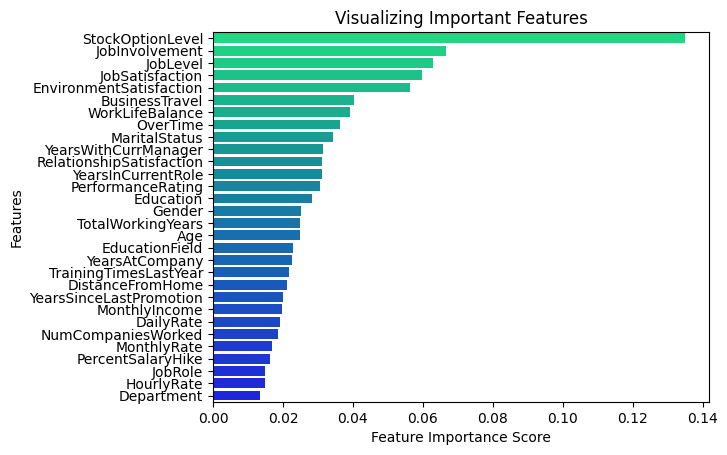

In [34]:
importances = get_feature_importances(X_train,y_train,xgb)
# Finding the variable with more importance
feature_imp = pd.Series(xgb.feature_importances_,index= X_train.columns).sort_values(ascending=False)
# Creating a bar plot
feature_imp=feature_imp[0:34,]
sns.barplot(x=feature_imp, y=feature_imp.index, palette='winter_r')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [35]:
pred = xgb.predict(X_test)

In [36]:
cm = np.array(confusion_matrix(y_test, pred, labels=[0,1]))
confusion = pd.DataFrame(cm, index=['will stay ', 'will leave'],
                         columns=['predicted_to stay','predicted_ to leave'])
confusion

,predicted_to stay,predicted_ to leave
will stay,185,66
will leave,13,30


<Axes: >

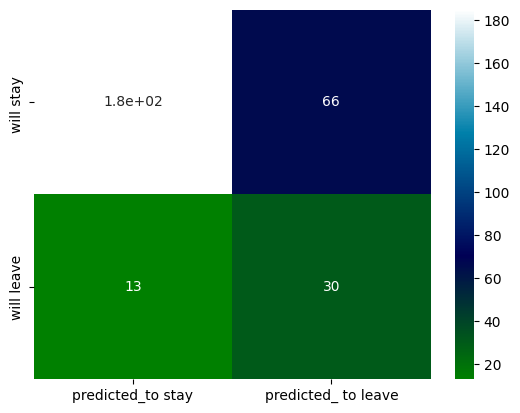

In [37]:
sns.heatmap(confusion, annot=True,cmap ='ocean')

In [38]:
from sklearn import metrics
from sklearn.metrics import classification_report
print('accuracy %s' %metrics.accuracy_score(pred,y_test))
target_names = ['NO', 'YES']
print(classification_report(y_test,pred,target_names=target_names))

accuracy 0.7312925170068028
              precision    recall  f1-score   support

          NO       0.93      0.74      0.82       251
         YES       0.31      0.70      0.43        43

    accuracy                           0.73       294
   macro avg       0.62      0.72      0.63       294
weighted avg       0.84      0.73      0.77       294



In [39]:
attritted(y_test,pred)

True values for employess that left the job are 43
Among those 30 were predicted accurately and 13 were misclassified.


**logistic Regression**

In [40]:
log_reg = LogisticRegression()
log_reg.fit(X_resampled, y_resampled)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

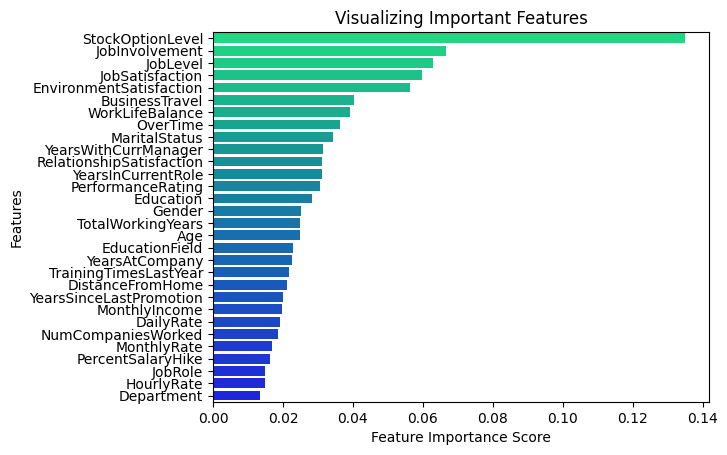

In [41]:
importances = get_feature_importances(X_train,y_train,log_reg)
# Finding the variable with more importance

coefficients = log_reg.coef_[0]

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
#feature_importance = feature_importance.sort_values('Importance', ascending=True)
#feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))
#feature_imp = pd.Series(log_reg.feature_importances_,index= X_train.columns).sort_values(ascending=False)
# Creating a bar plot
feature_imp=feature_imp[0:34,]
sns.barplot(x=feature_imp, y=feature_imp.index, palette='winter_r')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [42]:
prediction_log = log_reg.predict(X_test)

In [43]:
cm = np.array(confusion_matrix(y_test, prediction_log, labels=[0,1]))
confusion = pd.DataFrame(cm, index=['will stay ', 'will leave'],
                         columns=['predicted_to stay','predicted_ to leave'])
confusion

,predicted_to stay,predicted_ to leave
will stay,155,96
will leave,22,21


<Axes: >

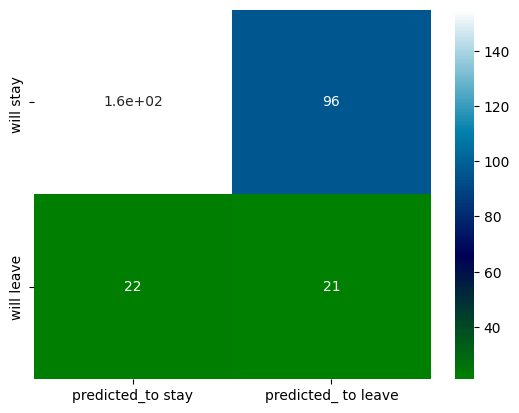

In [44]:
sns.heatmap(confusion, annot=True,cmap ='ocean')

In [45]:
from sklearn import metrics
from sklearn.metrics import classification_report
print('accuracy %s' %metrics.accuracy_score(prediction_log,y_test))
target_names = ['NO', 'YES']
print(classification_report(y_test, prediction_log,target_names=target_names))

accuracy 0.5986394557823129
              precision    recall  f1-score   support

          NO       0.88      0.62      0.72       251
         YES       0.18      0.49      0.26        43

    accuracy                           0.60       294
   macro avg       0.53      0.55      0.49       294
weighted avg       0.77      0.60      0.66       294



In [46]:
attritted(y_test,prediction_log)

True values for employess that left the job are 43
Among those 21 were predicted accurately and 22 were misclassified.
